In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

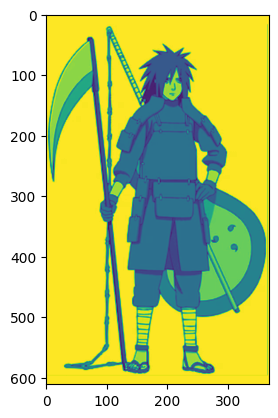

In [21]:
img = cv2.imread("test.png", 0) # here 0 means greyscale 1 means rgb channel,
plt.imshow(img)
plt.show()

(611, 368)


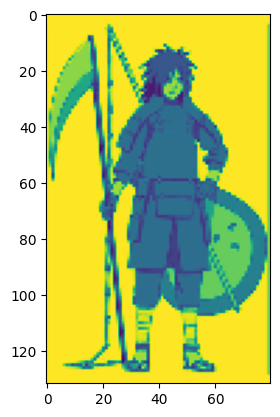

(132, 80)


In [22]:
val = img.shape
print(val)
col = val[0]/(val[1]/80.0)
resized_image = cv2.resize(img, (80, int(col)))

plt.imshow(resized_image)
plt.show()
print(resized_image.shape)



In [23]:
f = open("font10.txt", "r")
charset = f.read()
f.close()
charset
arr = []
for char in charset:
    arr.append(char)
arr.remove("\n")    # it contain the whole charset for 10 char files

row = resized_image.shape[1]
col = resized_image.shape[0]

arr2 = [[0 for j in range(row)] for i in range(col)]

print(len(arr2))
print(len(arr2[0]))
print(resized_image.shape)

import math 

for i in range (0,col):
    for j in range (0,row):
        arr2[i][j] = arr[math.floor(resized_image[i][j]/25.6)]
        

#for i in arr2:
#    print(i)
#resized_image


#arr3 = [[0 for j in range(row)] for i in range(col)]

#for i in range (0,col):
#    for j in range (0,row):
#        arr3[i][j] = resized_image[i][j]

#print(arr3)

arr[math.floor((resized_image[25][40]/25.6))]

for el in arr2:
    print(el)



132
80
(132, 80)
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 

In [24]:
# Convert 2D Array to String
array_string = '\n'.join([' '.join(map(str, row)) for row in arr2])


# Write to Text File
filename = "cvoutput10.txt"
with open(filename, 'w') as file:
    file.write(array_string)






In [25]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont


# **Improved Image Rendering with PIL**
font_size = 26  # Adjust font size to balance width-height ratio
font_path = "usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf"  # Use a monospace font (update path if needed)

try:
    font = ImageFont.truetype(font_path, font_size)
except IOError:
    font = ImageFont.load_default()  # Fallback to default font

# **Fix Aspect Ratio for Proper Scaling**
char_width, char_height = font.getsize("A")  # Get width & height of a single character
aspect_ratio = char_height / char_width  # Aspect ratio of the font (important!)

# **Calculate image dimensions**
cols = len(arr2[0])  # Number of columns (characters per row)
rows = len(arr2)  # Number of rows

# **Apply Aspect Ratio Fix**
padding_x = 250  # Extra space on left & right
padding_y = 50  # Extra space on top & bottom
image_width = int(cols * char_width * 1.8) + padding_x  # Width scaled properly
image_height = int(rows * char_height * 1.2) + padding_y  # Height scaled with some extra space

# **Create a blank white image**
image = Image.new("RGB", (image_width, image_height), "white")
draw = ImageDraw.Draw(image)

# **Draw ASCII text with correct aspect ratio**
x_start = padding_x // 2  # Centering horizontally
y_start = padding_y // 2  # Centering vertically

y = y_start
for row in arr2:
    text = ' '.join(row)  # Add spacing between characters
    draw.text((x_start, y), text, font=font, fill="black")
    y += int(char_height * 1.2)  # Line spacing fix

# **Save image file**
image_filename = "cvoutput10.png"
image.save(image_filename)

print(f" Saved fixed ASCII image as {image_filename}")


 Saved fixed ASCII image as cvoutput10.png
